### Reshaping your data using melt
Melting data is the process of turning columns of your data into rows of data. Consider the DataFrames from the previous exercise. In the tidy DataFrame, the variables Ozone, Solar.R, Wind, and Temp each had their own column. If, however, you wanted these variables to be in rows instead, you could melt the DataFrame. In doing so, however, you would make the data untidy! This is important to keep in mind: Depending on how your data is represented, you will have to reshape it differently (e.g., this could make it easier to plot values).

In this exercise, you will practice melting a DataFrame using pd.melt(). There are two parameters you should be aware of: id_vars and value_vars. The id_vars represent the columns of the data you do not want to melt (i.e., keep it in its current shape), while the value_vars represent the columns you do wish to melt into rows. By default, if no value_vars are provided, all columns not set in the id_vars will be melted. This could save a bit of typing, depending on the number of columns that need to be melted.

The (tidy) DataFrame airquality has been pre-loaded. Your job is to melt its Ozone, Solar.R, Wind, and Temp columns into rows. Later in this chapter, you'll learn how to bring this melted DataFrame back into a tidy form.

In [193]:
import pandas as pd
import numpy as np

In [194]:
airquality = pd.read_csv('D:\\ml_code\\data_science\\datacamp_proj\\cleaning_data\\data\\airquality.csv')

In [195]:
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Use pd.melt() to melt the Ozone, Solar.R, Wind, and Temp columns of airquality into rows. Do this by using id_vars to specify the columns you do not wish to melt: 'Month' and 'Day'

In [196]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN


### Customizing melted data
When melting DataFrames, it would be better to have column names more meaningful than variable and value (the default names used by pd.melt()).

The default names may work in certain situations, but it's best to always have data that is self explanatory.

You can rename the variable column by specifying an argument to the var_name parameter, and the value column by specifying an argument to the value_name parameter. You will now practice doing exactly this. Pandas as pd and the DataFrame airquality has been pre-loaded for you.

In [197]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


### Pivot data
Pivoting data is the opposite of melting it. Remember the tidy form that the airquality DataFrame was in before you melted it? You'll now begin pivoting it back into that form using the .pivot_table() method!

While melting takes a set of columns and turns it into a single column, pivoting will create a new column for each unique value in a specified column.

.pivot_table() has an index parameter which you can use to specify the columns that you don't want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that you have to specify are columns (the name of the column you want to pivot), and values (the values to be used when the column is pivoted). The melted DataFrame airquality_melt has been pre-loaded for you.

In [198]:
# Print the head of airquality_melt
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN
measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


### Resetting the index of a DataFrame
After pivoting airquality_melt in the previous exercise, you didn't quite get back the original DataFrame.

What you got back instead was a pandas DataFrame with a hierarchical index (also known as a MultiIndex).

Hierarchical indexes are covered in depth in Manipulating DataFrames with pandas. In essence, they allow you to group columns or rows by another variable - in this case, by 'Month' as well as 'Day'.

There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: .reset_index(). Dan didn't show you how to use this method in the video, but you're now going to practice using it in this exercise to get back the original DataFrame from airquality_pivot, which has been pre-loaded.

In [199]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

# Print the head of airquality_pivot_reset
print(airquality_pivot_reset.head())

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

### Pivoting duplicate values
So far, you've used the .pivot_table() method when there are multiple index values you want to hold constant during a pivot. In the video, Dan showed you how you can also use pivot tables to deal with duplicate values by providing an aggregation function through the aggfunc parameter. Here, you're going to combine both these uses of pivot tables.

Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in which each row is duplicated, has been pre-loaded as airquality_dup. In addition, the airquality_melt DataFrame from the previous exercise has been pre-loaded. Explore their shapes in the IPython Shell by accessing their .shape attributes to confirm the duplicate rows present in airquality_dup.

You'll see that by using .pivot_table() and the aggfunc parameter, you can not only reshape your data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted DataFrame using .reset_index().

NumPy and pandas have been imported as np and pd respectively.

In [201]:
# Pivot table the airquality_dup: airquality_pivot
#airquality_pivot = airquality_dup.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)

# Print the head of airquality_pivot before reset_index
#print(airquality_pivot.head())

# Reset the index of airquality_pivot
#airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
#print(airquality_pivot.head())

# Print the head of airquality
#print(airquality.head())

### Splitting a column with .str
The dataset you saw in the video, consisting of case counts of tuberculosis by country, year, gender, and age group, has been pre-loaded into a DataFrame as tb.

In this exercise, you're going to tidy the 'm014' column, which represents males aged 0-14 years of age. In order to parse this value, you need to extract the first letter into a new column for gender, and the rest into a column for age_group. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the str attribute of columns of type object.

Begin by printing the columns of tb in the IPython Shell using its .columns attribute, and take note of the problematic column.

In [202]:
tb = pd.read_csv('D:\\ml_code\\data_science\\datacamp_proj\\cleaning_data\\data\\tb.csv')

In [203]:
tb.head()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


In [204]:
# Melt tb: tb_melt
tb_melt = pd.melt(frame=tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


### Splitting a column with .split() and .get()
Another common way multiple variables are stored in columns is with a delimiter. You'll learn how to deal with such cases in this exercise, using a dataset consisting of Ebola cases and death counts by state and country. It has been pre-loaded into a DataFrame as ebola.

Print the columns of ebola in the IPython Shell using ebola.columns. Notice that the data has column names such as Cases_Guinea and Deaths_Guinea. Here, the underscore _ serves as a delimiter between the first part (cases or deaths), and the second part (country).

This time, you cannot directly slice the variable by position as in the previous exercise. You now need to use Python's built-in string method called .split(). By default, this method will split a string into parts separated by a space. However, in this case you want it to split by an underscore. You can do this on Cases_Guinea, for example, using Cases_Guinea.split('_'), which returns the list ['Cases', 'Guinea'].

The next challenge is to extract the first element of this list and assign it to a type variable, and the second element of the list to a country variable. You can accomplish this by accessing the str attribute of the column and using the .get() method to retrieve the 0 or 1 index, depending on the part you want.

In [205]:
ebola = pd.read_csv('D:\\ml_code\\data_science\\datacamp_proj\\cleaning_data\\data\\ebola.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [206]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

In [207]:
ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


Create a column called 'str_split' by splitting the 'type_country' column of ebola_melt on '_'. Note that you will first have to access the str attribute of type_country before you can use .split()

In [208]:
# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split("_")

In [209]:
ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [210]:
# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())

         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


## Ch4 Cleaning Data for Analysis

### Converting data types
In this exercise, you'll see how ensuring all categorical variables in a DataFrame are of type category reduces memory usage.

The tips dataset has been loaded into a DataFrame called tips. This data contains information about how much a customer tipped, whether the customer was male or female, a smoker or not, etc.

Look at the output of tips.info() in the IPython Shell. You'll note that two columns that should be categorical - sex and smoker - are instead of type object, which is pandas' way of storing arbitrary strings. Your job is to convert these two columns to type category and note the reduced memory usage.

In [211]:
tips = pd.read_csv('D:\\ml_code\\data_science\\datacamp_proj\\cleaning_data\\data\\tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [212]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [213]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


In [214]:
tips.sex.dtypes

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

### Working with numeric data
If you expect the data type of a column to be numeric (int or float), but instead it is of type object, this typically means that there is a non numeric value in the column, which also signifies bad data.

You can use the pd.to_numeric() function to convert a column into a numeric data type. If the function raises an error, you can be sure that there is a bad value within the column. You can either use the techniques you learned in Chapter 1 to do some exploratory data analysis and find the bad value, or you can choose to ignore or coerce the value into a missing value, NaN.

A modified version of the tips dataset has been pre-loaded into a DataFrame called tips. For instructional purposes, it has been pre-processed to introduce some 'bad' data for you to clean. Use the .info() method to explore this. You'll note that the total_bill and tip columns, which should be numeric, are instead of type object. Your job is to fix this.

In [215]:
tips_copy = tips.copy()

In [216]:
tips_copy.total_bill = tips_copy.total_bill.astype('object')

In [217]:
tips_copy.total_bill[0] = '#'

C:\Users\richard\Anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [218]:
tips_copy.total_bill[0]

'#'

In [219]:
#this will error because of '#'
#tips_copy.total_bill = tips_copy.total_bill.astype('int64')

In [220]:
#therefore use force numeric
tips_copy.total_bill = pd.to_numeric(tips_copy['total_bill'],errors='coerce')

In [221]:
tips_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    243 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB


In [222]:
tips_copy.total_bill[:10]

0      NaN
1    10.34
2    21.01
3    23.68
4    24.59
5    25.29
6     8.77
7    26.88
8    15.04
9    14.78
Name: total_bill, dtype: float64

In [223]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'],errors = 'coerce')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


### String parsing with regular expressions
In the video, Dan introduced you to the basics of regular expressions, which are powerful ways of defining patterns to match strings. This exercise will get you started with writing them.

When working with data, it is sometimes necessary to write a regular expression to look for properly entered values. Phone numbers in a dataset is a common field that needs to be checked for validity. Your job in this exercise is to define a regular expression to match US phone numbers that fit the pattern of xxx-xxx-xxxx.

The regular expression module in python is re. When performing pattern matching on data, since the pattern will be used for a match across multiple rows, it's better to compile the pattern first using re.compile(), and then use the compiled pattern to match values.

In [224]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))


True
False


### Extracting numerical values from strings
Extracting numbers from strings is a common task, particularly when working with unstructured data or log files.

Say you have the following string: 'the recipe calls for 6 strawberries and 2 bananas'.

It would be useful to extract the 6 and the 2 from this string to be saved for later use when comparing strawberry to banana ratios.

When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the re.findall() function. Dan did not discuss this in the video, but it is straightforward to use: You pass in a pattern and a string to re.findall(), and it will return a list of the matches.

In [225]:
# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


### Pattern matching
In this exercise, you'll continue practicing your regular expression skills. For each provided string, your job is to write the appropriate pattern to match it.

Write patterns to match:
A telephone number of the format xxx-xxx-xxxx. You already did this in a previous exercise.

In [226]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

True


A string of the format: A dollar sign, an arbitrary number of digits, a decimal point, 2 digits.
Use \$ to match the dollar sign, \d* to match an arbitrary number of digits, \. to match the decimal point, and \d{x} to match x number of digits.

In [227]:
# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

True


A capital letter, followed by an arbitrary number of alphanumeric characters.
Use [A-Z] to match any capital letter followed by \w* to match an arbitrary number of alphanumeric characters.

In [228]:
# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True


### Custom functions to clean data
You'll now practice writing functions to clean data.

The tips dataset has been pre-loaded into a DataFrame called tips. It has a 'sex' column that contains the values 'Male' or 'Female'. Your job is to write a function that will recode 'Female' to 0, 'Male' to 1, and return np.nan for all entries of 'sex' that are neither 'Female' nor 'Male'.

Recoding variables like this is a common data cleaning task. Functions provide a mechanism for you to abstract away complex bits of code as well as reuse code. This makes your code more readable and less error prone.

As Dan showed you in the videos, you can use the .apply() method to apply a function across entire rows or columns of DataFrames. However, note that each column of a DataFrame is a pandas Series. Functions can also be applied across Series. Here, you will apply your function over the 'sex' column.

In [229]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [230]:
def recode_gender(gender):
    if gender == 'Male':
        return 1
    elif gender == 'Female':
        return 0
    else:
        return np.nan 

In [231]:
tips['recode'] = tips['sex'].apply(recode_gender)

In [232]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,recode
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [233]:
tips['recode2'] = tips.sex.apply(lambda x:1 if x == 'Male' else 0)

In [234]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,recode,recode2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


In [235]:
tips.drop(['recode2'],axis=1,inplace=True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,recode
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


### Lambda functions
You'll now be introduced to a powerful Python feature that will help you clean your data more effectively: lambda functions. Instead of using the def syntax that you used in the previous exercise, lambda functions let you make simple, one-line functions.

For example, here's a function that squares a variable used in an .apply() method:

def my_square(x):
    return x ** 2

df.apply(my_square)
The equivalent code using a lambda function is:

df.apply(lambda x: x ** 2)
The lambda function takes one parameter - the variable x. The function itself just squares x and returns the result, which is whatever the one line of code evaluates to. In this way, lambda functions can make your code concise and Pythonic.

The tips dataset has been pre-loaded into a DataFrame called tips. Your job is to clean its 'total_dollar' column by removing the dollar sign. You'll do this using two different methods: With the .replace() method, and with regular expressions. The regular expression module re has been pre-imported.

In [236]:
# Write the lambda function using replace
#tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
#tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
#print(tips.head())

In [237]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
recode        244 non-null category
dtypes: category(3), float64(2), int64(1), object(2)
memory usage: 10.6+ KB


### Dropping duplicate data
Duplicate data causes a variety of problems. From the point of view of performance, they use up unnecessary amounts of memory and cause unneeded calculations to be performed when processing data. In addition, they can also bias any analysis results.

A dataset consisting of the performance of songs on the Billboard charts has been pre-loaded into a DataFrame called billboard. Check out its columns in the IPython Shell. Your job in this exercise is to subset this DataFrame and then drop all duplicate rows.

In [238]:
# Create the new DataFrame: tracks
#tracks = billboard[['year','artist','track','time']]

# Print info of tracks
#print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
#tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
#print(tracks_no_duplicates.info())

### Filling missing data
Here, you'll return to the airquality dataset from Chapter 2. It has been pre-loaded into the DataFrame airquality, and it has missing values for you to practice filling in. Explore airquality in the IPython Shell to checkout which columns have missing values.

It's rare to have a (real-world) dataset without any missing values, and it's important to deal with them because certain calculations cannot handle missing values while some calculations will, by default, skip over any missing values.

Also, understanding how much missing data you have, and thinking about where it comes from is crucial to making unbiased interpretations of data.

In [239]:
# Calculate the mean of the Ozone column: oz_mean
#oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
#airquality['Ozone'] = airquality['Ozone'].fillna(oz_mean)

# Print the info of airquality
#print(airquality.info())

### Testing your data with asserts
Here, you'll practice writing assert statements using the Ebola dataset from previous chapters to programmatically check for missing values and to confirm that all values are positive. The dataset has been pre-loaded into a DataFrame called ebola.

In the video, you saw Dan use the .all() method together with the .notnull() DataFrame method to check for missing values in a column. The .all() method returns True if all values are True. When used on a DataFrame, it returns a Series of Booleans - one for each column in the DataFrame. So if you are using it on a DataFrame, like in this exercise, you need to chain another .all() method so that you return only one True or False value. When using these within an assert statement, nothing will be returned if the assert statement is true: This is how you can confirm that the data you are checking are valid.

Note: You can use pd.notnull(df) as an alternative to df.notnull().

In [240]:
ebola = pd.read_csv('D:\\ml_code\\data_science\\datacamp_proj\\cleaning_data\\data\\ebola.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [241]:
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [242]:
# Assert that there are no missing values
assert ebola.notnull().all().all()

AssertionError: 

In [243]:
# Assert that all values are >= 0
assert (ebola >= 0).all().all()

AssertionError: 

## Case Study

In [247]:
gapminder = pd.read_csv('D:\\ml_code\\data_science\\datacamp_proj\\cleaning_data\\data\\gapminder.csv')

In [248]:
gapminder.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [249]:
gapminder.columns

Index(['Unnamed: 0', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Life expectancy'],
      dtype='object', length=219)

In [250]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, Unnamed: 0 to Life expectancy
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


In [251]:
gapminder.describe()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,780.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000
mean,129.500000,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,...,70.139712,70.447163,70.767740,70.969904,71.324375,71.663077,71.916106,72.088125,72.32101,72.556635
std,75.103138,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,...,8.953255,8.800452,8.610341,8.898859,8.376540,8.217466,8.120852,8.074990,7.90202,7.738535
min,0.000000,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,...,43.300000,44.500000,45.500000,32.200000,46.700000,46.100000,45.600000,45.400000,47.10000,48.860000
25%,64.750000,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,...,64.825000,64.875000,65.225000,65.475000,65.600000,66.075000,66.475000,66.775000,67.05000,67.175000
50%,129.500000,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,...,72.750000,73.000000,73.350000,73.700000,73.750000,74.050000,74.150000,74.300000,74.40000,74.500000
75%,194.250000,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,...,76.925000,77.150000,77.425000,77.650000,77.825000,78.125000,78.300000,78.400000,78.50000,78.650000
max,259.000000,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,...,84.500000,84.600000,84.600000,84.700000,84.700000,84.700000,84.800000,84.800000,84.80000,84.800000


### Visualizing your data
Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

The DataFrame g1800s has been pre-loaded. Your job in this exercise is to create a scatter plot with life expectancy in '1800' on the x-axis and life expectancy in '1899' on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

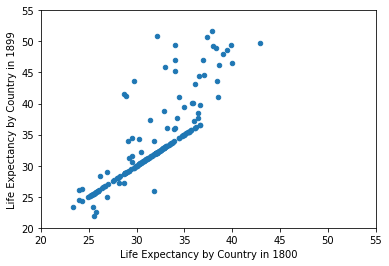

In [252]:
g1800s = gapminder.copy()

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
gapminder.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

In [253]:
g1800s.drop(['Unnamed: 0'],axis=1,inplace=True)
#g1800s.columns
g1800s.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [254]:
#move life expectancy to start of dataframe
cols = list(g1800s.columns.values)
cols.pop(cols.index('Life expectancy'))
g1800s = g1800s[['Life expectancy'] + cols]


In [255]:
g1800s.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', length=218)

### Thinking about the question at hand
Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

'Life expectancy' is the first column (index 0) of the DataFrame.
The other columns contain either null or numeric values.
The numeric values are all greater than or equal to 0.
There is only one instance of each country.
You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

In [256]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] =='Life expectancy'

# Check whether the values in the row are valid
#Write an assert statement to test that all the values are valid for the g1800s DataFrame.
#Use the check_null_or_valid() function placed inside the .apply() method for this.
#Note that because you're applying it over the entire DataFrame, and not just one column,
#you'll have to chain the .all() method twice
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
#Write an assert statement to make sure that each country occurs only once in the data. Use the .value_counts()
#method on the 'Life expectancy' column for this. Specifically, index 0 of .value_counts() will contain the most
#frequently occuring value. If this is equal to 1 for the 'Life expectancy' column, then you can be certain that
#no country appears more than once in the data
assert g1800s['Life expectancy'].value_counts()[0] == 1

AssertionError: 

In [ ]:
g1800s[g1800s['Life expectancy'] == 'Portugal']

In [ ]:
g1800s = g1800s.loc[:,'Life expectancy':'1899']

In [ ]:
g1800s[g1800s['Life expectancy'] == 'Albania']

In [257]:
#want only 1800 - 1898 and rows repeat after row 259
g1800s = g1800s.iloc[0:260,:]

In [258]:
g1800s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 218 entries, Life expectancy to 2016
dtypes: float64(217), object(1)
memory usage: 442.9+ KB


In [259]:
#after editing the dataframe to be same as datacamp we pass the asserts

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] =='Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

### Reshaping your data
Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it.

In [260]:
gapminder.head()
gapminder.drop(['Unnamed: 0'],axis=1,inplace=True)
#g1800s.columns
gapminder.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


Reshape gapminder by melting it. Keep 'Life expectancy' fixed by specifying it as an argument to the id_vars parameter.

In [261]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder,id_vars=['Life expectancy'])
gapminder_melt.head()

,Life expectancy,variable,value
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


Rename the three columns of the melted DataFrame to 'country', 'year', and 'life_expectancy' by passing them in as a list to gapminder_melt.columns.
Print the head of the melted DataFrame

In [262]:
# Rename the columns
gapminder_melt.columns = ['country','year','life_expectancy']

# Print the head of gapminder_melt
gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


### Checking the data types
Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type object, year is of type int64, and life_expectancy is of type float64.

The tidy DataFrame has been pre-loaded as gapminder. Explore it in the IPython Shell using the .info() method. Notice that the column 'year' is of type object. This is incorrect, so you'll need to use the pd.to_numeric() function to convert it to a numeric data type.

NumPy and pandas have been pre-imported as np and pd.

In [263]:
gapminder = gapminder_melt.copy()

In [264]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


### Checking the data types
Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type object, year is of type int64, and life_expectancy is of type float64.

The tidy DataFrame has been pre-loaded as gapminder. Explore it in the IPython Shell using the .info() method. Notice that the column 'year' is of type object. This is incorrect, so you'll need to use the pd.to_numeric() function to convert it to a numeric data type.

- Convert the year column of gapminder using pd.to_numeric().
- Assert that the country column is of type np.object. This has been done for you.
- Assert that the year column is of type np.int64.
- Assert that the life_expectancy column is of type np.float64

In [265]:
# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder.year)

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64 

In [266]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null int64
life_expectancy    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ MB


In [267]:
gapminder.year = gapminder.year.astype('uint16')
gapminder.life_expectancy = gapminder.life_expectancy.astype('float16')

In [268]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null uint16
life_expectancy    43857 non-null float16
dtypes: float16(1), object(1), uint16(1)
memory usage: 1.9+ MB


### Looking at country spellings
Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the 'country' column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

- The set of lower and upper case letters.
- Whitespace between words.
- Periods for any abbreviations.

To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - str.contains() - which takes a regular expression pattern, and applies it to the Series, returning True if there is a match, and False otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ~. This Boolean series can then be used to get the Series of countries that have invalid names.

- Create a Series called countries consisting of the 'country' column of gapminder.
- Drop all duplicates from countries using the .drop_duplicates() method.
- Write a regular expression that tests your assumptions of what characters belong in countries:
    - Anchor the pattern to match exactly what you want by placing a ^ in the beginning and $ in the end.
    - Use A-Za-z to match the set of lower and upper case letters, \. to match periods, and \s to match whitespace between - - words.
- Use str.contains() to create a Boolean vector representing values that match the pattern.
- Invert the mask by placing a ~ before it.
- Subset the countries series using the .loc[] accessor and mask_inverse. Then hit 'Submit Answer' to see the invalid country names!

In [269]:
# Create the series of countries: countries
countries = gapminder.country

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~ mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


### More data cleaning and processing
It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See pandas Foundations for more on forward fill and backward fill.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have NaN in the life_expectancy column. Before doing so, it would be valuable to use assert statements to confirm that year and country do not have any missing values.

Begin by printing the shape of gapminder in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be after dropping the missing values!

- Assert that country and year do not contain any missing values. The first assert statement has been written for you. Note the chaining of the .all() method to pd.notnull() to confirm that all values in the column are not null.


- Drop the rows in the data where any observation in life_expectancy is missing. As you confirmed that country and year don't have missing values, you can use the .dropna() method on the entire gapminder DataFrame, because any missing values would have to be in the life_expectancy column. The .dropna() method has the default keyword arguments axis=0 and how='any', which specify that rows with any missing values should be dropped

In [270]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

# Assert that country does not contain any missing values
assert pd.notnull(gapminder.year).all()

# Drop the missing values,default is axis=0, how='any - drops rows
gapminder = gapminder.dropna(how= 'any')
# Print the shape of gapminder
print(gapminder.shape)

(43857, 3)


### Wrapping up
Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. In this exercise, you'll begin by creating a histogram of the life_expectancy column. You should not get any values under 0 and you should see something reasonable on the higher end of the life_expectancy age range.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the life_expectancy column from each subset, and take an average of the values. You can achieve this using the .groupby() method. This .groupby() method is covered in greater depth in Manipulating DataFrames with pandas.

Finally, you can save your tidy and summarized DataFrame to a file using the .to_csv() method.

year
1800    31.484375
1801    31.453125
1802    31.468750
1803    31.375000
1804    31.453125
Name: life_expectancy, dtype: float16
year
2012    71.6875
2013    71.9375
2014    72.0625
2015    72.3125
2016    72.5625
Name: life_expectancy, dtype: float16


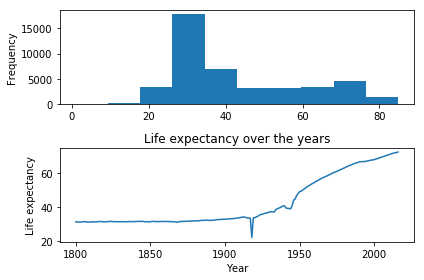

In [285]:
# Add first subplot
plt.subplot(2, 1, 1) 

#Create a histogram of the life_expectancy column using the .plot() method of gapminder. Specify kind='hist'.
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
#____
#____

In [276]:
gapminder.head()

,country,year,life_expectancy
1,Afghanistan,1800,28.203125
3,Albania,1800,35.406250
4,Algeria,1800,28.812500
7,Angola,1800,26.984375
9,Antigua and Barbuda,1800,33.531250
